# Support Vector Machines

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import scipy.io as sio

## Part 1: Linear Models

In [106]:
data = sio.loadmat('Practice\Machine Learning\machine-learning-ex6\ex6\ex6data1.mat')

In [107]:
X = data['X']
y = data['y'].ravel()

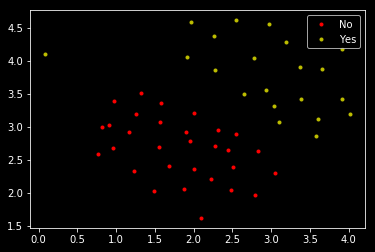

In [108]:
fig, ax = plt.subplots(1)

ax.plot(X[y==0, 0], X[y==0, 1], 'r.', label='No')
ax.plot(X[y==1, 0], X[y==1, 1], 'y.', label='Yes')
ax.legend()
plt.show()

In [109]:
model_linear = svm.SVC(C=1, kernel='linear')
model_linear.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

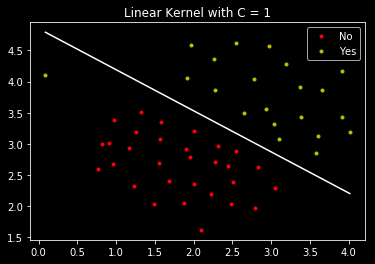

In [110]:
# plotting decision boundary

w = model_linear.coef_
c = model_linear.intercept_
w1 = w[0][0]
w2 = w[0][1]
c = c[0]

fig, ax = plt.subplots(1)

xp = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

yp = -(xp*w1 + c)/w2
ax.plot(xp, yp, 'w-')
ax.plot(X[y==0, 0], X[y==0, 1], 'r.', label='No')
ax.plot(X[y==1, 0], X[y==1, 1], 'y.', label='Yes')
ax.legend()
ax.set_title('Linear Kernel with C = 1')
plt.show()

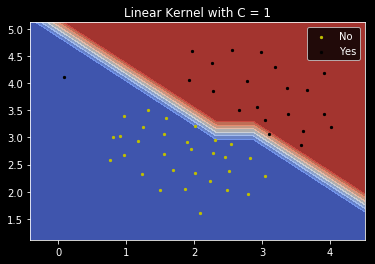

In [119]:
# plotting decision contour

x0 = np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 10)
x1 = np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 10)
xx, yy = np.meshgrid(x0, x1)
z = model_linear.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)


fig, ax = plt.subplots(1)
ax.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X[y==0, 0], X[y==0, 1], c='y', s=5, label='No')
ax.scatter(X[y==1, 0], X[y==1, 1], c='k', s=5, label='Yes')
ax.legend()
ax.set_title('Linear Kernel with C = 1')
plt.show()


## Part 2: Using Gausian Kernel

In [120]:
def gausian_kernel(x1, x2, sigma=0.1):
    return np.exp( -np.sum((x1-x2)**2) / (2*(sigma**2)) );

In [121]:
data = sio.loadmat('Practice\Machine Learning\machine-learning-ex6\ex6\ex6data2.mat')
X = data['X']
y = data['y'].ravel()

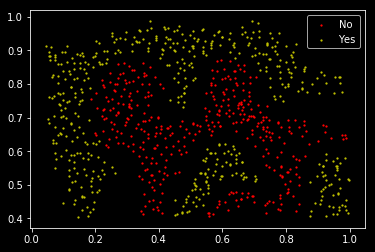

In [122]:
fig, ax = plt.subplots(1)

ax.scatter(X[y==0, 0], X[y==0, 1], c='r', s=1.5, label='No')
ax.scatter(X[y==1, 0], X[y==1, 1], c='y', s=1.5, label='Yes')
ax.legend()
plt.show()

In [123]:
C = 1
sigma = 0.1
gamma = 50
model = svm.SVC(C=1, kernel='rbf', gamma=gamma )
model.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [124]:
acc = y[y==model.predict(X)].size/y.size*100
print(acc)

98.95712630359212


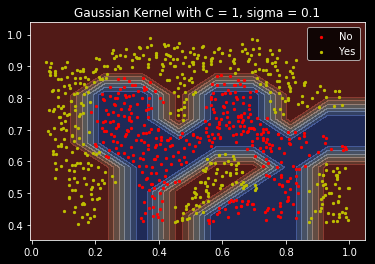

In [136]:
# plotting decision contour

x0 = np.linspace(X[:, 0].min()-0.05, X[:, 0].max()+0.05, 10)
x1 = np.linspace(X[:, 1].min()-0.05, X[:, 1].max()+0.05, 10)
x0, x1 = np.meshgrid(x0, x1)
z = model.predict(np.c_[x0.ravel(), x1.ravel()])
z = z.reshape(xx.shape)


fig, ax = plt.subplots(1)
ax.contourf(x0, x1, z, cmap=plt.cm.coolwarm, alpha=0.4)
ax.scatter(X[y==0, 0], X[y==0, 1], c='r', s=5, label='No')
ax.scatter(X[y==1, 0], X[y==1, 1], c='y', s=5, label='Yes')
ax.legend()
ax.set_title('Gaussian Kernel with C = 1, sigma = 0.1')
plt.show()